# <font color = 'Purple' size = '18'> Project 3: EasyVisa </font>

<font color = 'purple'  >- By Sulabh Kumar Agarwal </font>

## <font color = 'purple'> PART I - Business Context, Objective and Dataset Info </font>

### <font color = 'Purple'>Business Context:</font>

Business communities in the United States are facing high demand for human resources, <b> but one of the constant challenges is identifying and attracting the right talent </b>, which is perhaps the most important element in remaining competitive. <b> Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad </b>.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.


### <font color = 'Purple'>Objective:</font>

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. <b> This was a nine percent increase in the overall number of processed applications from the previous year </b>. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.


The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. <b><i> As a data scientist at EasyVisa, we have to analyze the data provided and, with the help of a classification model:</i></b>

* <b><i>Facilitate the process of visa approvals.</i></b>
* <b><i>Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status</i></b>

### <font color = 'Purple'> Dataset Description </font>

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.


* <b>'case_id':</b> ID of each visa application
* <b>'continent':</b> Information of continent the employee
* <b>'education_of_employee':</b> Information of education of the employee
* <b>'has_job_experience':</b> Does the employee has any job experience? Y= Yes; N = No
* <b>'requires_job_training':</b> Does the employee require any job training? Y = Yes; N = NoN
* <b>'no_of_employees':</b> Number of employees in the employer's company
* <b>'yr_of_estab':</b> Year in which the employer's company was established
* <b>'region_of_employment':</b> Information of foreign worker's intended region of employment in the US.
* <b>'prevailing_wage':</b> Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* <b>'unit_of_wage':</b> Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* <b>'full_time_position':</b> Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* <b>'case_status':</b> Flag indicating if the Visa was certified or denied

## <font color='purple'>PART II - Data Loading and Preliminary Checks</font>

### <font color = 'Purple'> Import Libraries </font>

In [8]:
# Below Package is to suppress any warnings that we get while executing the packages.
import warnings
warnings.filterwarnings("ignore")

# Usefull libraries for loading data and data operations
import pandas as pd
import numpy as np
from scipy.stats import randint

# Libraries for ML Model training and validations
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Libraries for Model Validation
from sklearn.metrics import ( 
        accuracy_score, 
        confusion_matrix,
        recall_score,
        precision_score,
        f1_score,
)
from sklearn import metrics

# Librabries for ploting data
import seaborn as sns
import matplotlib.pyplot as plt

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# to enable plots displayed inline within the notebook, rather than in a separate window or output cell
%matplotlib inline

### <font color='Purple'>Data Load and Preliminary checks</font>

In [10]:
# Read data
data = pd.read_csv("EasyVisa.csv")

In [11]:
# Make a copy of Data to retain original version if required later
copy = data.copy()

In [12]:
# Check the shape of data i.e. Row and column count
data.shape

(25480, 12)

In [13]:
# Observe first 5 records
data.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [14]:
# Check Data types and any MIssing data or Nullable fields
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [15]:
# Observe the numeric columns for the priliminary analysis.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [16]:
# Null/missing value check
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [17]:
# Check for unique values in each column of the data
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [18]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### <font color='purple'>Observation from preliminary analysis</font>

* Dataset contains <b> 12 Columns </b> and <b> 25480 rows </b>.
* <b> Col - 'case_id' </b> is unique identifier and can be dropped from the dataset.
* Dataset contains <b> 3 numeric columns </b> - 'no_of_employees', 'yr_of_estab' & 'prevailing_wage'. Rest seems categorical columns.
* Some rows contains <b> -ve values in 'no_of_employees' column </b> which could be data entry error. We can either replace them with some default or use Absolute function.
* <b> No Null/missing data </b> in the dataset, hence no treatment needed for missing values.
* The col <b> "no_of_employees" </b> has a mean of 5,667 and median of 2,109. This indicates <b> skewed distribution </b>.
* The col <b> "prevailing_wage" </b> ranges from 2 to 319,210. This indicates <b> skewed distribution </b>.
  

## <font color='purple'> PART III - EDA, Univariate, Bivariate Analysis & Data Pre-Processing</font>

### <font color = 'purple'>Define Standard functions to help with anlaysis </font>

In [22]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.tight_layout()

In [23]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### <font color='purple'> Univariate Analysis </font>

In [25]:
# Check for Target Variable distribution for imblance
(data["case_status"].value_counts()/data.shape[0])*100


case_status
Certified    66.789639
Denied       33.210361
Name: count, dtype: float64

In [26]:
# Create List of Categorical and Numeric columns

categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment',  'unit_of_wage', 'full_time_position', 'case_status']

remaining_cols = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

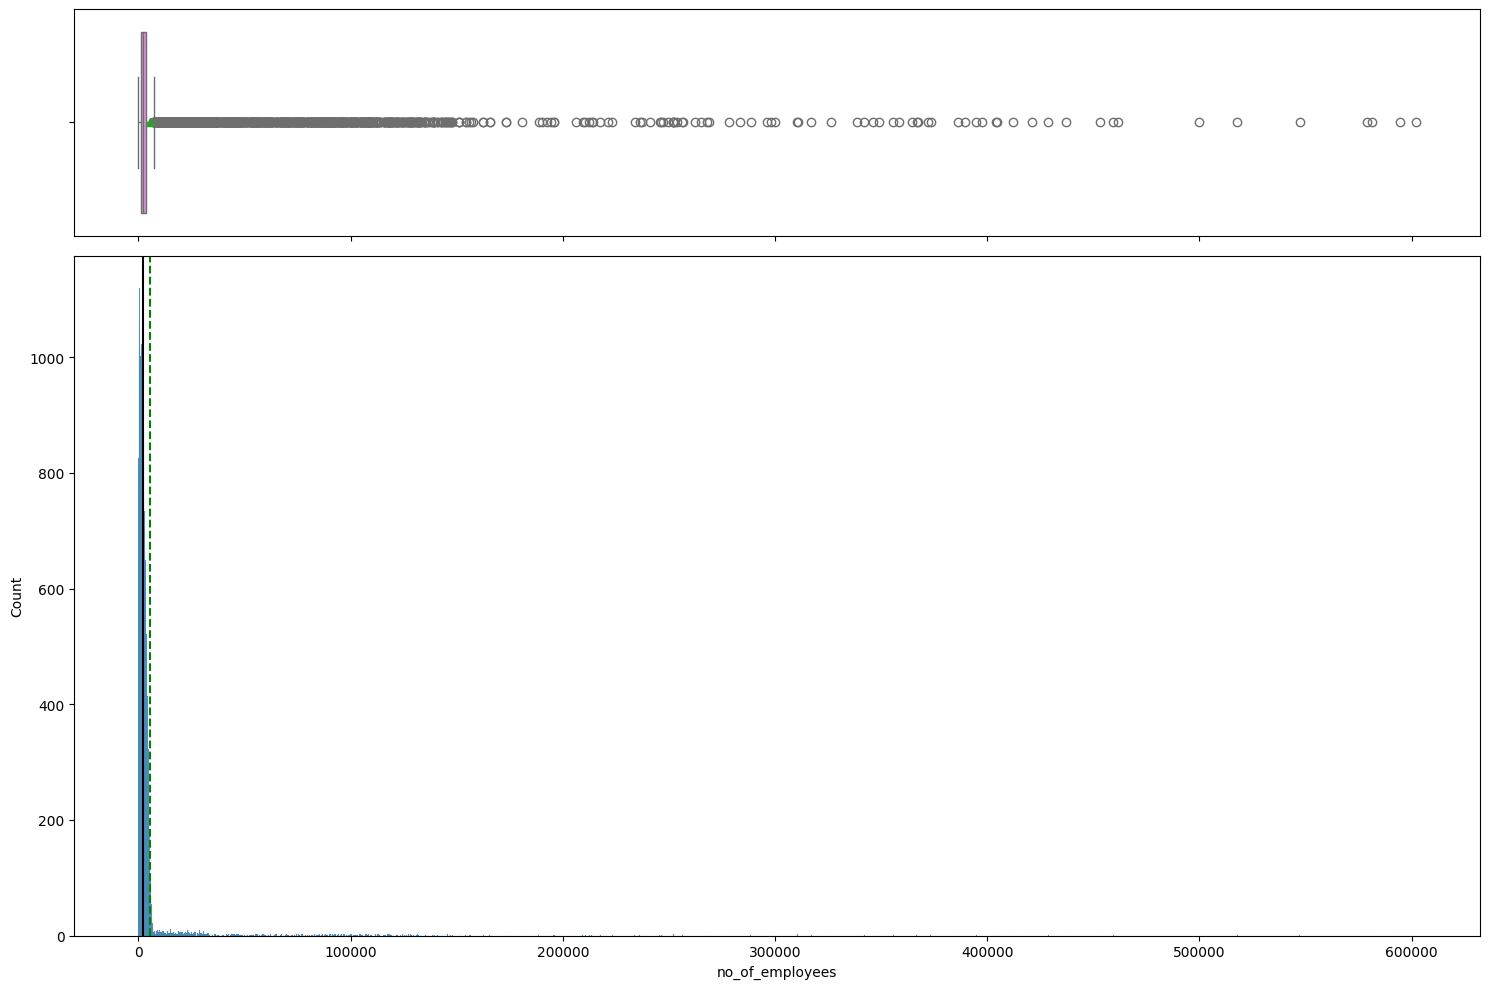

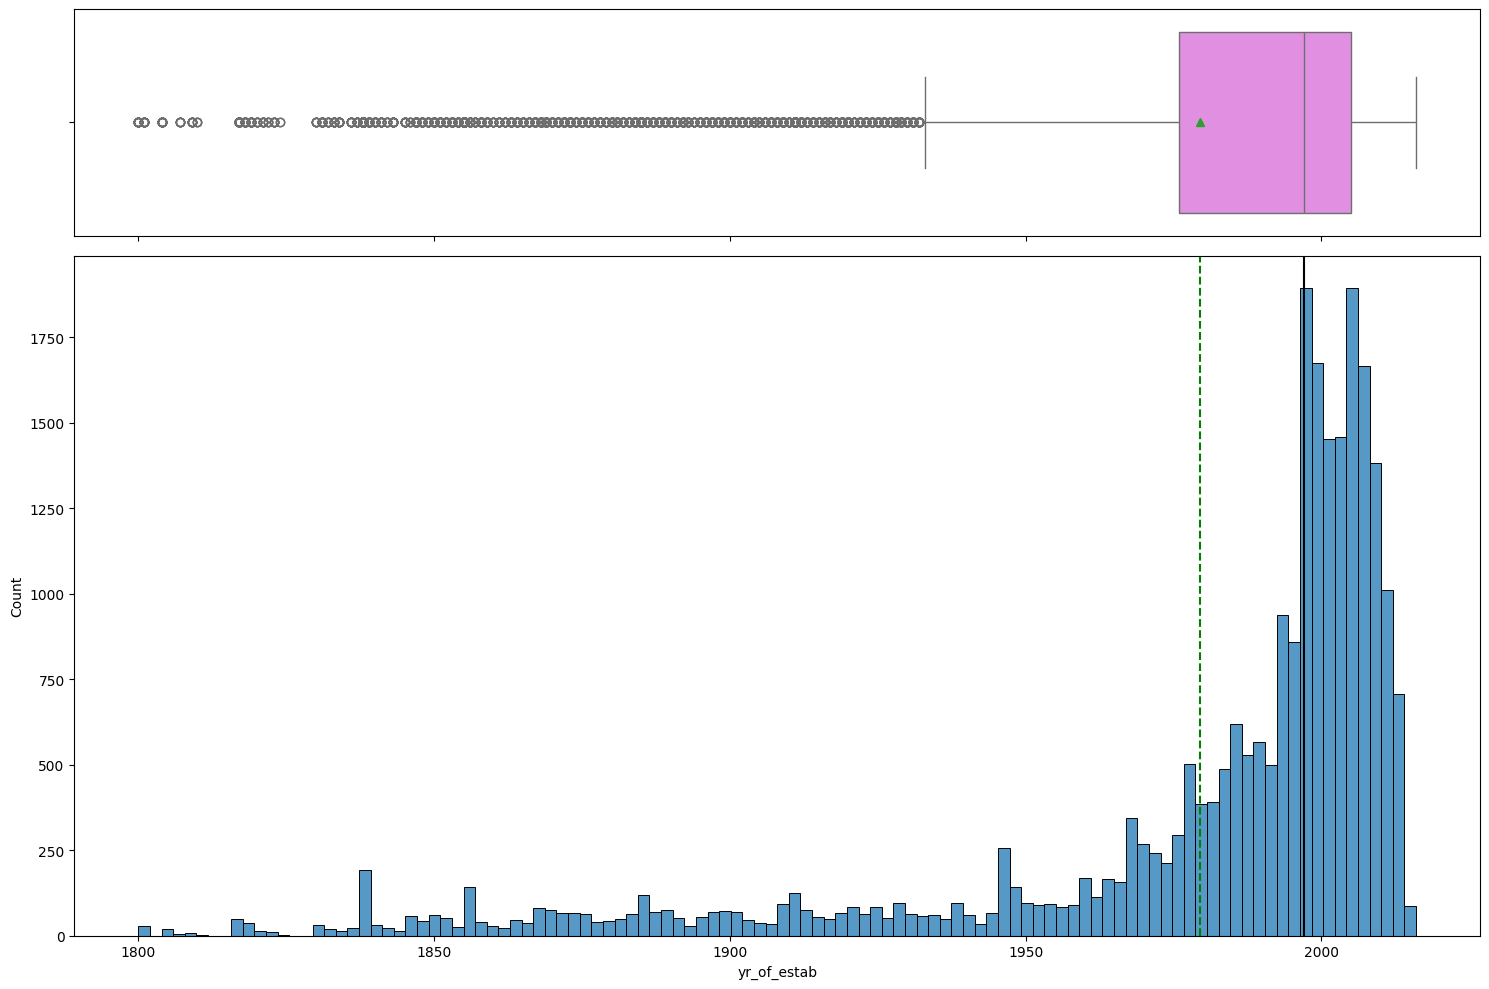

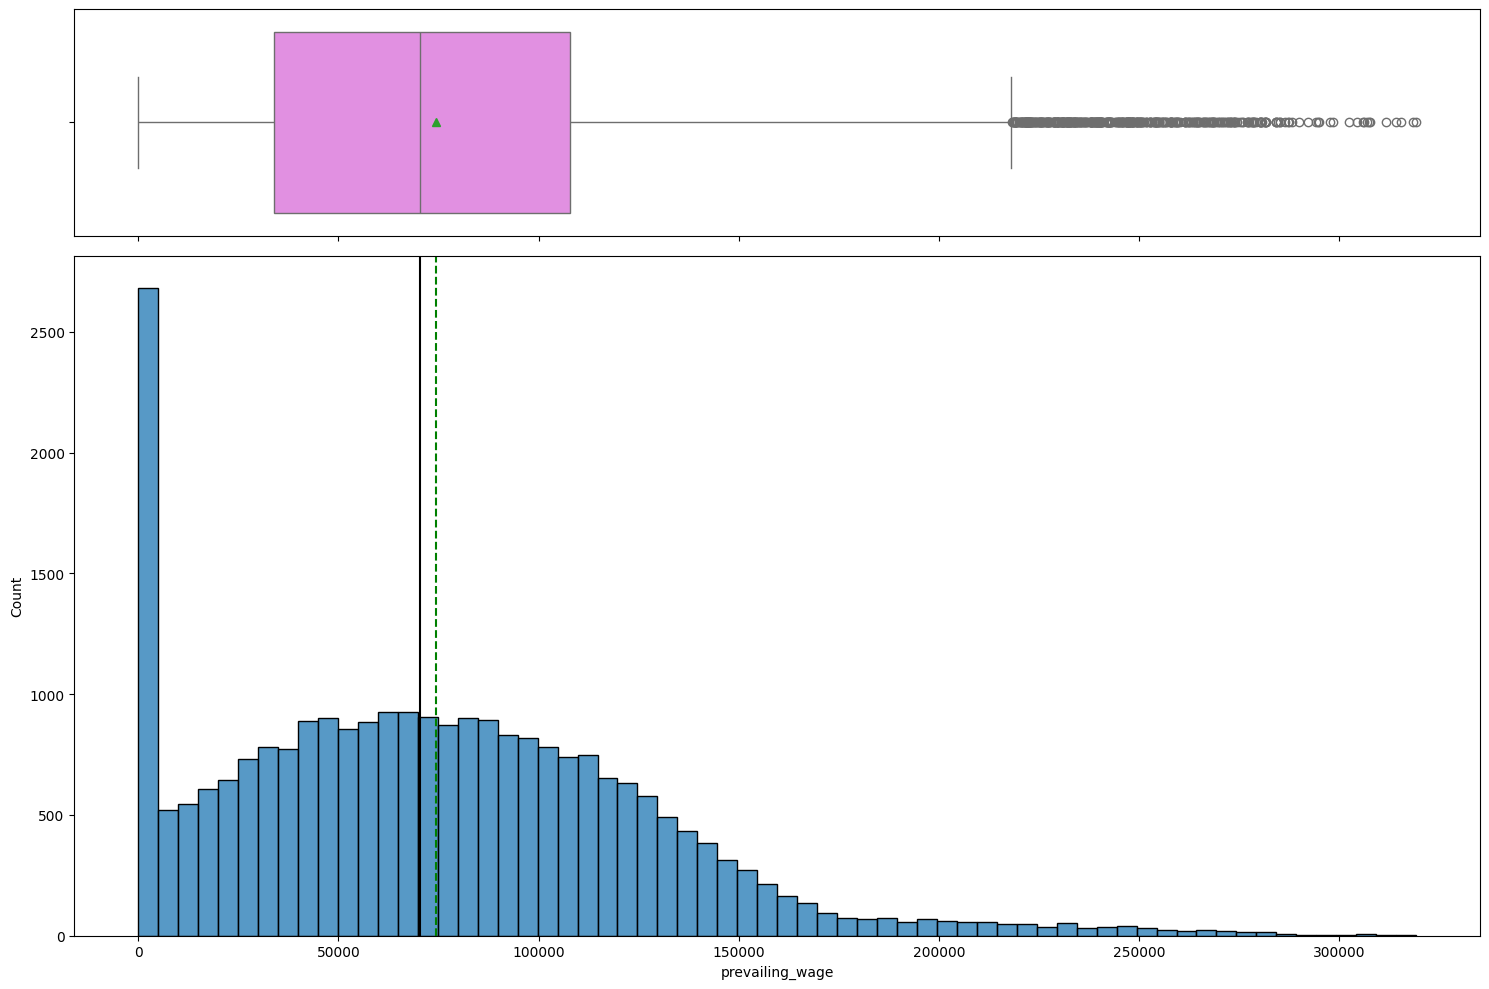

In [27]:
#plt.figure(figsize=(15,10))
for i, feature in enumerate(remaining_cols):
    #plt.subplot(3,1,i+1)
    histogram_boxplot(data, feature)
#plt.tight_layout()

Prevailing Wage seems to have lot of values around 0, which needs further investigation:

In [29]:
data.loc[data['prevailing_wage'] < 100, ].head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,EZYV339,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,EZYV635,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,EZYV840,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,EZYV877,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,EZYV996,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified


In [30]:
# Looks like these small prevailing wages have 'Hourly' unit, lets check:

data.loc[data['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

unit_of_wage
Hour    176
Name: count, dtype: int64

As we increase the range of prevailing wage beyond 100, we will start getting other unit of wages as well.

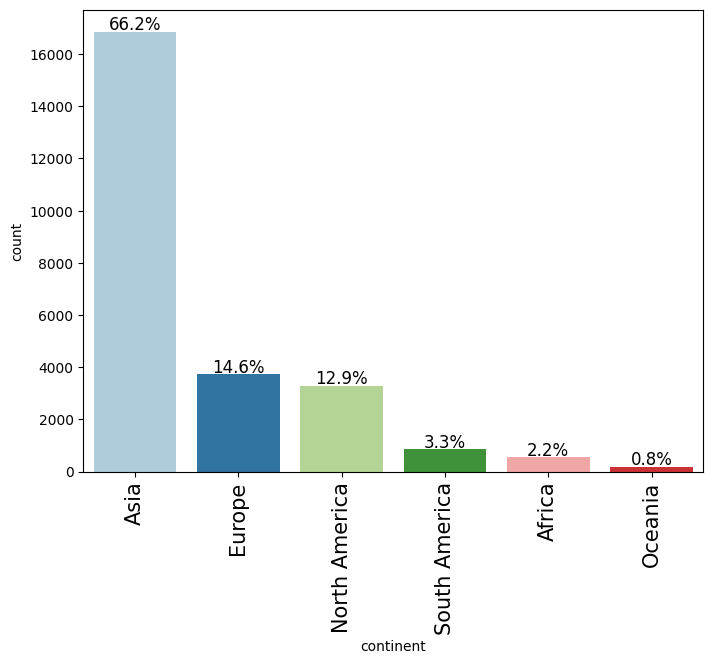

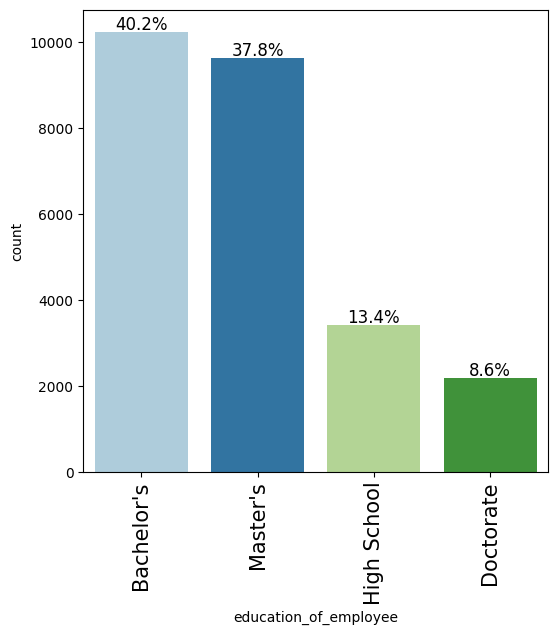

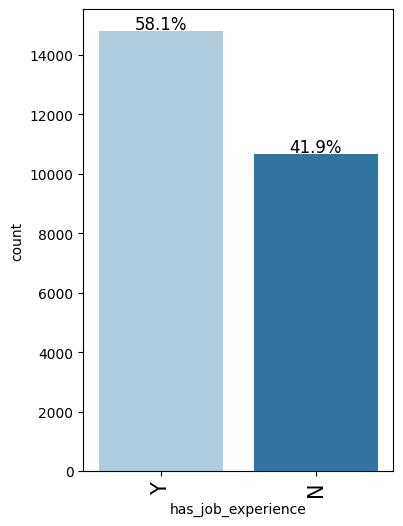

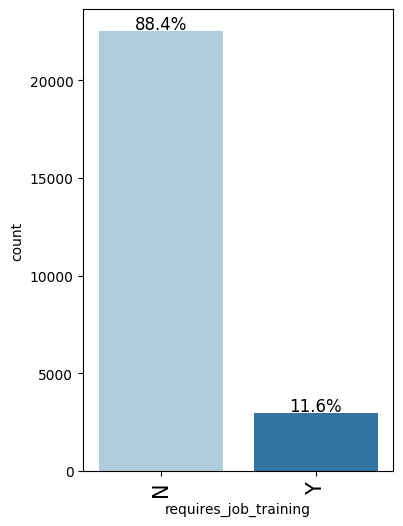

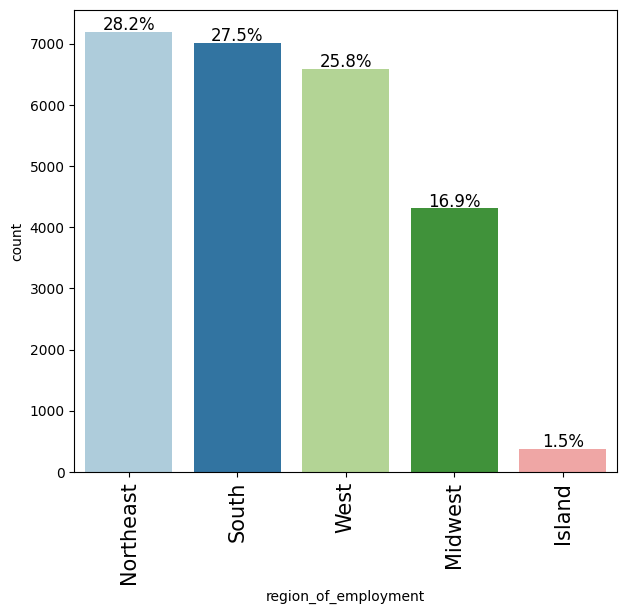

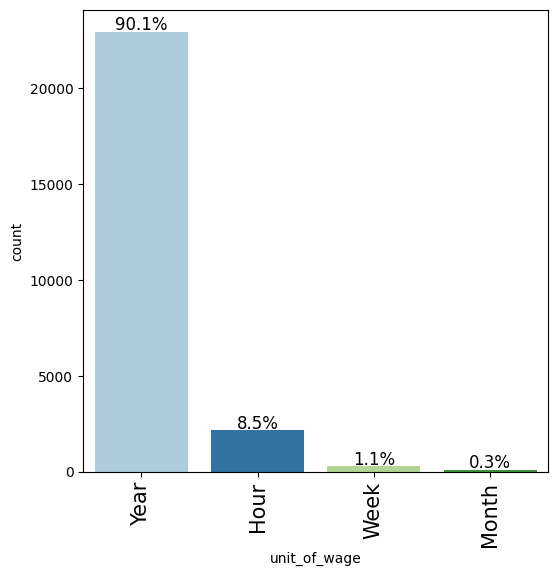

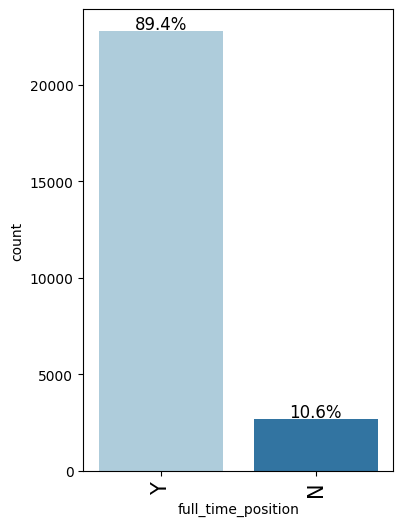

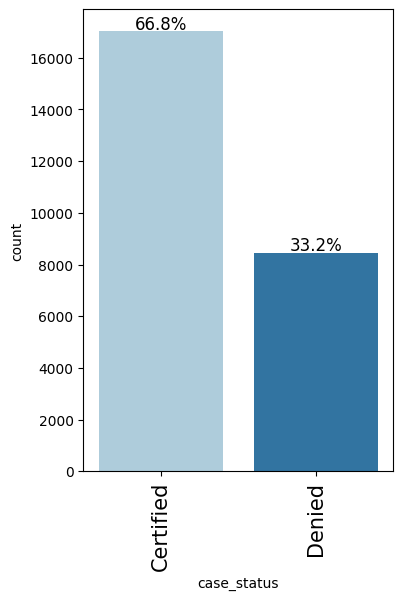

<Figure size 640x480 with 0 Axes>

In [32]:
# Check for the distribution of case_studies across other columns 
for i, feature in enumerate(categorical_cols):
    labeled_barplot(data, feature, perc=True)
plt.tight_layout()

#### <font color = 'purple'>Observation </font>

* There is some imbalance in the Target Variable which would be worth to model using imbalance techniques like Oversampling and Undersampling
* Distribution in <b>'no_of_employees' is extremely Right Skewed </b> with Mean as 5667 and Median as 2109
* Distribution in <b>'yr_of_establishment' is extremely Left Skewed </b>with Mean as 1979 and Median as 1997
* Distribution in <b>'prevailing_wage' is right skewed </b> with Mean as 74456 and Median as 70308
* <b>'Asia' seems most popular continent </b> with >66% applications coming from.
* <b>'Bachelor's' & 'Master's' </b> are most common Education of Employees among applications with total 77.8% applicaitons
* 58.1% application have Job Experience.
* 88.4% applicants does not require Job Training.
* Region of Employment seems evenly distributed except for 'Island' with only 1.5% applications
* 90% applications have 'Year' as unit of wage and ~ 90% applications apply for full time position

### <font color='purple'> Bivariate Analysis </font>

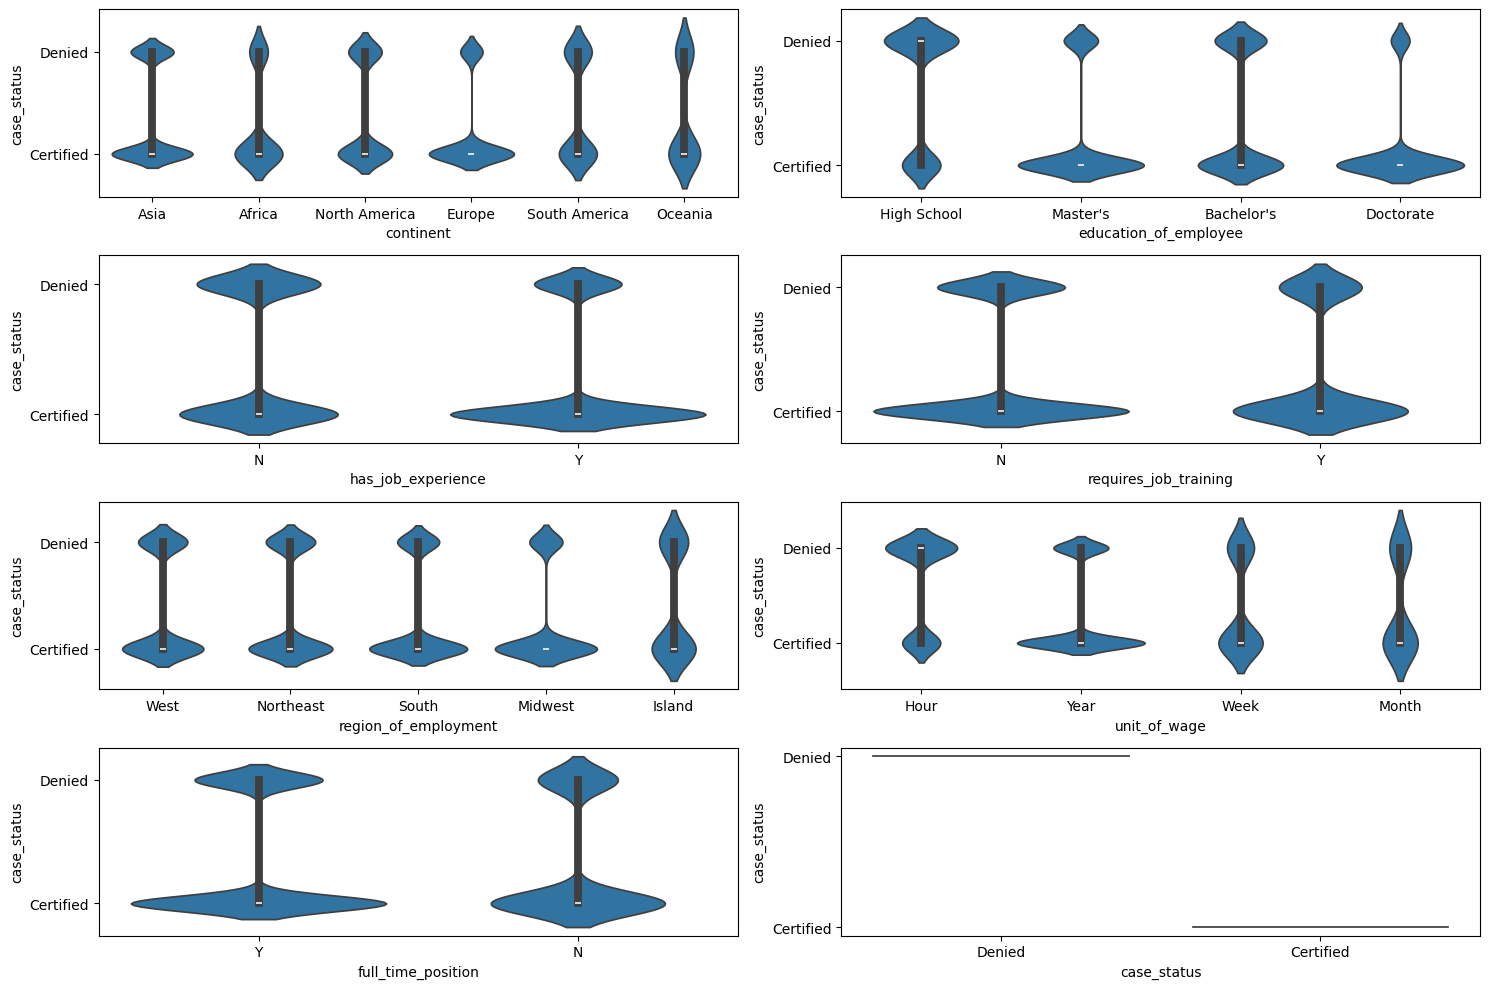

In [35]:
# Check for the distribution of case_studies across other columns 
plt.figure(figsize=(15,10))
for i, feature in enumerate(categorical_cols):
    plt.subplot(4,2,i+1)
    sns.violinplot(x=feature, y="case_status", data=data)
plt.tight_layout()

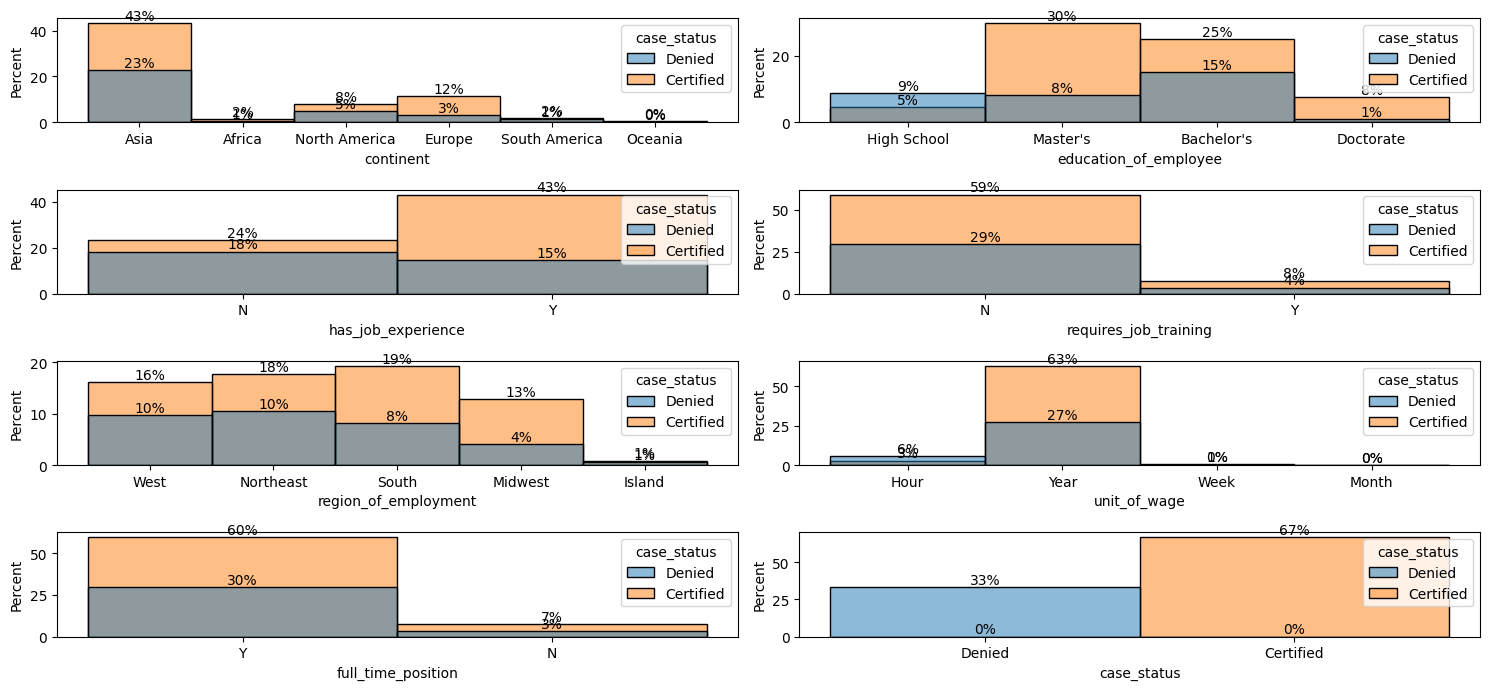

In [36]:
# Using Labled Histogram for check distribution of the variable and relation with the target variable

plt.figure(figsize=(15,10))
for i, feature in enumerate(categorical_cols):
    plt.subplot(6,2,i+1)
    hist_plot = sns.histplot(data=data[categorical_cols], x=feature, hue = 'case_status', stat = 'percent')

    # Add percentage labels on top of each bar
    for container in hist_plot.containers:
        # Format as percentage with Zero decimal place
        hist_plot.bar_label(container, fmt='%.0f%%')
    
plt.tight_layout()

# Maximum Applications comes from Asia (~66%) followed by Europe (~15%).
# Most Applications have eudcation of employee either Bachelor or Master (~78%). Application with High School are more Denied than Certified.
# 58% applications are wth Job experience as Y.
# 88% applications does not need Job Training
# Region of employment seems normally distributed
# Unit of wages as "Year" comprises of 90% of applications.
# Full time Position as "Y" comprises of 90% of applications.

* Out of ~77% (of total applications) from 'Asia' continent 43% are Certified.
* Applicants with Master's and Bachelor's have higher chance of getting certified. Total 55% of such applicants got certified.
* Application with Job Experience have more chance to get certified. Total 43% of such applicants got certified.
* Application requiring no Job Training requirement have more chance of getting certified. Total 59% of such applicants got certified.
* 'Year' as unit of wage is more preferred and have higher chance to get certified. Total 63% of such applicats got certified.
* Applications with Full time position have higher chance to get certified. Total 60% of such applicats got certified.

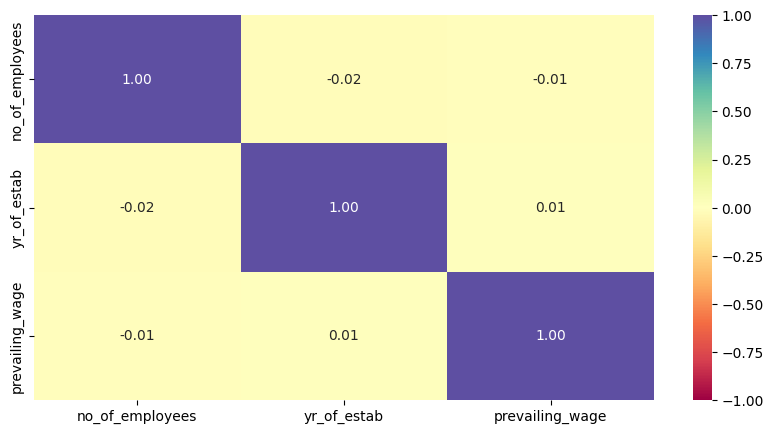

In [38]:
# create the correlation matrix for numeric columns
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[remaining_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

No Co-Relation observed between numeric columns

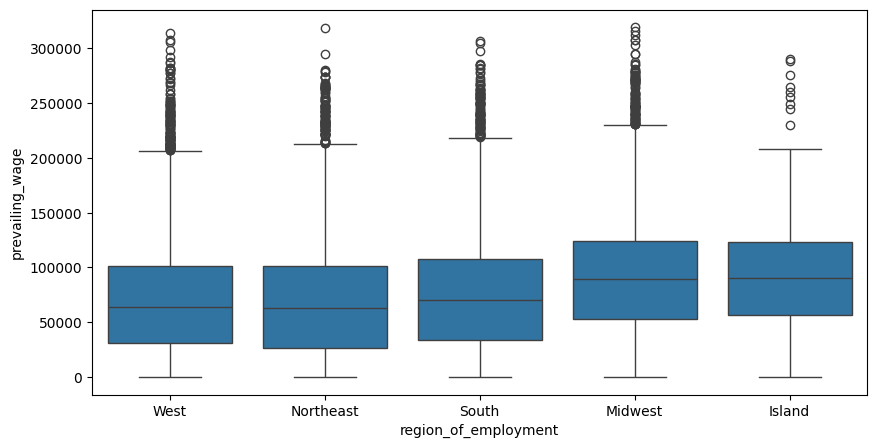

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

* Midwest Region seems to have higher prevailing wages as compared to other regions

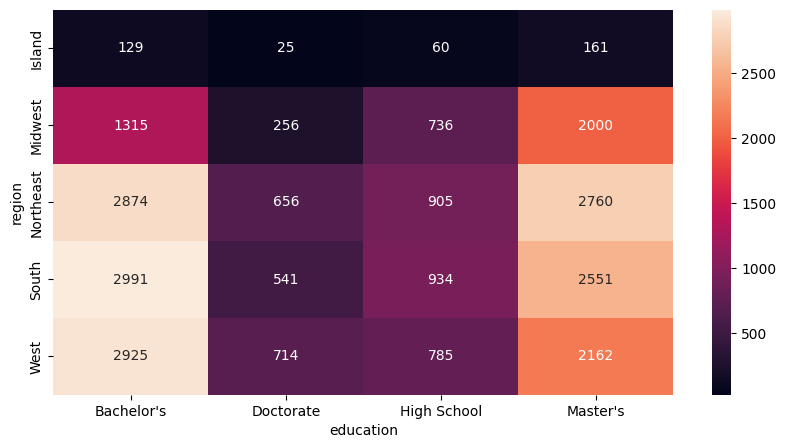

In [42]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["region_of_employment"], data["education_of_employee"]),
    annot=True,
    fmt="g",
)
plt.ylabel("region")
plt.xlabel("education")
plt.show()

* Applicants with Bachelor's prefer Midwest & Island less as compared to other regions
* Applicants with Master's prefer Northeast and South more as compared to West and Midwest
* Doctorate are lesser among applicants but prefer West and Northeast region


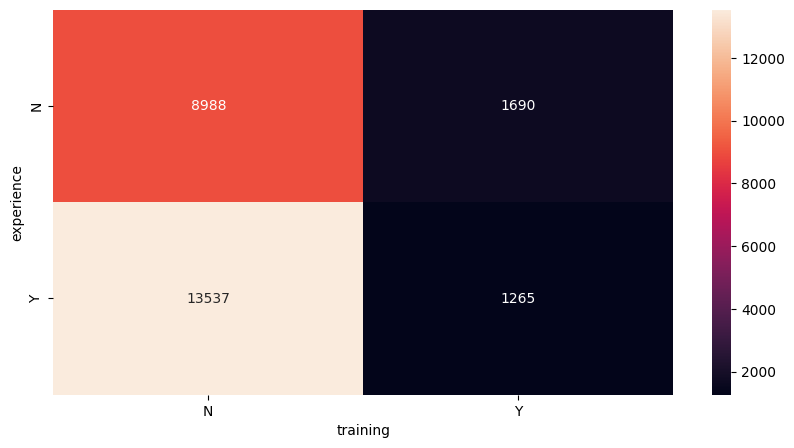

In [44]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["has_job_experience"], data["requires_job_training"]),
    annot=True,
    fmt="g",
)
plt.ylabel("experience")
plt.xlabel("training")
plt.show()

* Very Less Applicants with Job Experience require Job training (1265)
* Good number of applicants with no Job Experience require no training (8988) which is surprising

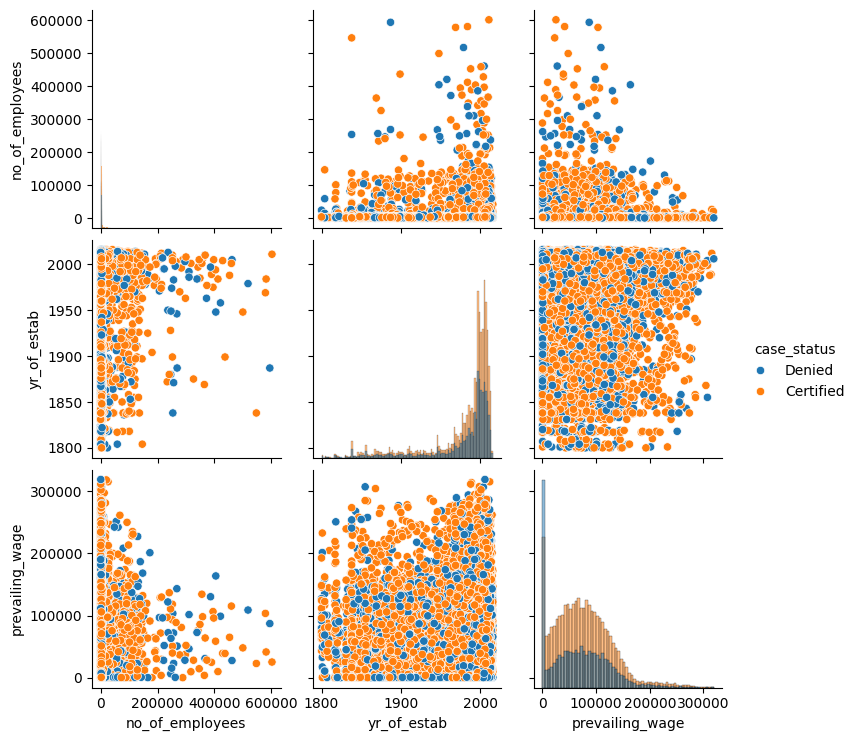

In [46]:
sns.pairplot(data, hue = 'case_status' , diag_kind='hist')
plt.show()

#### <font color = 'purple'> Observation Summary </font>

* Out of ~77% (of total applications) from 'Asia' continent 43% are Certified.
* Applicants with Master's and Bachelor's have higher chance of getting certified. Total 55% of such applicants got certified.
* Application with Job Experience have more chance to get certified. Total 43% of such applicants got certified.
* Application requiring no Job Training requirement have more chance of getting certified. Total 59% of such applicants got certified.
* 'Year' as unit of wage is more preferred and have higher chance to get certified. Total 63% of such applicats got certified.
* Applications with Full time position have higher chance to get certified. Total 60% of such applicats got certified.
* No Co-Relation observed between numeric columns
* Midwest Region seems to have higher prevailing wages as compared to other regions
* Applicants with Bachelor's prefer Midwest & Island less as compared to other regions
* 
Applicants with Master's prefer Northeast and South more as compared to West and Midwes
* 
Doctorate are lesser among applicants but prefer West and Northeast regi
* Very Less Applicants with Job Experience require Job training (1265)
* Good number of applicants with no Job Experience require no training (8988) which is surprising

### <font color='purple'> Data Pre-processing </font>

* Drop case_id column as this is unique identifier
* Convert Object type variables into Category variables
* Process No of Employees to remove -ve numbers and bucket them
* Outlier detection
* Target variable encoding

In [50]:
# Drop the Case Id column which nothing but unique indetifier for each record.
data.drop('case_id', axis=1, inplace=True)

In [51]:
# Convert Categorical columns into Category Datatype to help create dummy variables later on.
for i, feature in enumerate(categorical_cols):
    data[feature] = data[feature].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


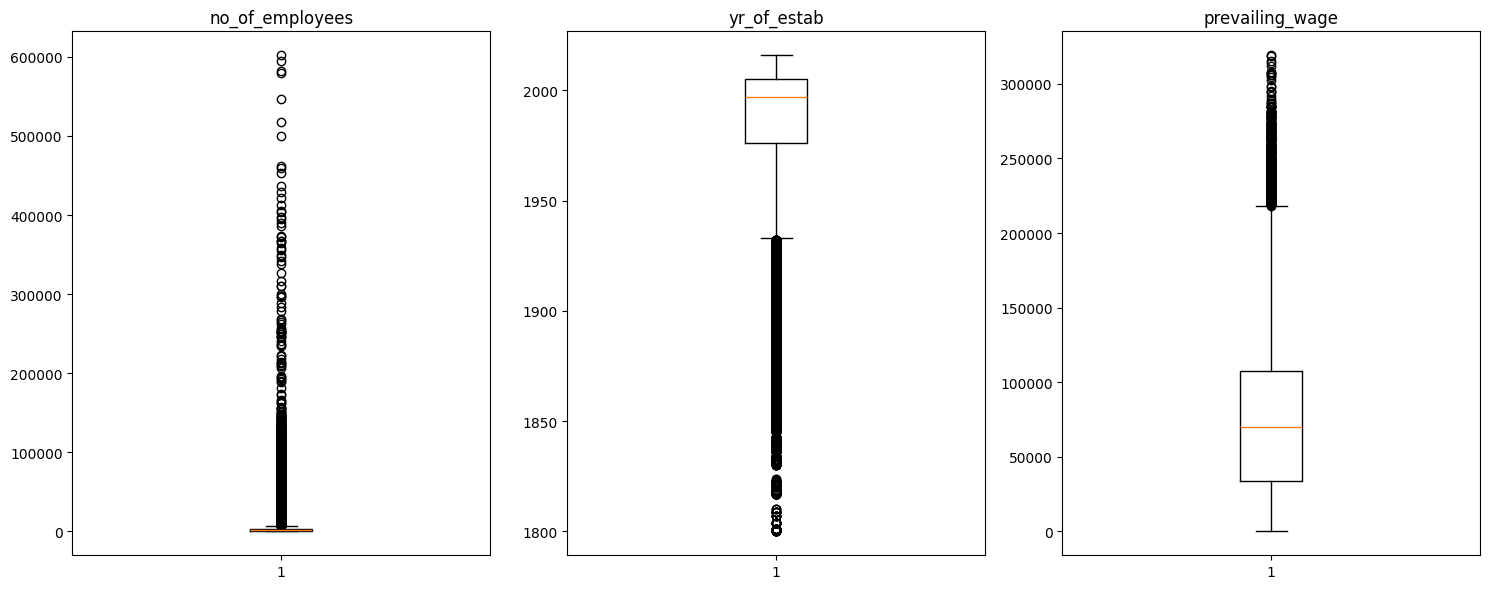

In [52]:
# outlier detection using boxplot
plt.figure(figsize=(15, 6))

for i, variable in enumerate(remaining_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


* There are too many outliers in all three attributes but No of Employees have more.
* We can try bucketing No of Employees and lets keep the other two as is for now


In [54]:
# In Part II we saw there are negative values in no of employees, let's see how many are these
data.loc[data['no_of_employees'] < 0].shape

(33, 11)

In [55]:
# Let's convert the negative values of no of employees to their absolute values and bucket them in Thousands.
data['no_of_employees'] = abs(data['no_of_employees'])

data[data.no_of_employees>2100].shape[0]/data.shape[0] 

0.5016483516483516

The mean distribution of No of employess seems to be around 2100

In [57]:
def emp_bucket(cnt):
    match cnt:
        case _ if cnt<=1000:
            return 0
        case _ if 1000 < cnt <=2000:
            return 1
        case _ if 2000 < cnt <=3000:
            return 2
        case _ if 3000 < cnt <=5000:
            return 3
        case _ if 4000 < cnt <=5000:
            return 4
        case _ if cnt >5000:
            return 5

data["emp_count"] = data["no_of_employees"].apply(emp_bucket)


    

In [58]:
# check for the employee count in new buckets.
data["emp_count"].value_counts()

emp_count
0    6241
1    5915
3    5709
2    4978
5    2637
Name: count, dtype: int64

In [59]:
data.drop('no_of_employees', axis=1, inplace=True)

In [60]:
# Encoding case_status, where certified is 1, denied is 0

data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

## <font color='purple'> PART IV - Model Generation and Evaluation </font>

### <font color='purple'>Dataset splitting - Train, Validation and Test </font>

In [63]:
# split dataset into feature (X) and target (Y)
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

# create dummy varialbes for categories
X = pd.get_dummies(X, drop_first=True)

In [64]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, Y, test_size=0.5, random_state=0, stratify=Y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)



In [65]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Test set : ", X_test.shape)
print("-"*30)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("-"*30)
print("Percentage of classes in Validation set:")
print(y_val.value_counts(normalize=True))
print("-"*30)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (12740, 21)
Shape of Validation set :  (7644, 21)
Shape of Test set :  (5096, 21)
------------------------------
Percentage of classes in training set:
case_status
1    0.667896
0    0.332104
Name: proportion, dtype: float64
------------------------------
Percentage of classes in Validation set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64
------------------------------
Percentage of classes in test set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


### <font color='purple'> Model Evaluation Criteria </font>


Model is aimed to predict valid applications to be approved for Visa. In-correct predictions can lead to following issues:

* If a valid visa application is denied then job opportunity is being given to less competent candidate.
* If a invalid visa applicaiton is approved then a less competent candidate gets the job, while a US resident is deined the opportunity.

Hence in this case these has to be a balance between Precision and Recall which indicates <b>'F1_Score'</b> to be the right metric to evaluate the models.
* Greater the F1 score higher are the chances of minimizing False Negatives and False Positives

* Define standard functions to be re-used with multiple models

In [69]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [70]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### <font color='purple'> Define Models - Model builing with Original Data </font>

In [72]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9881148505530712
Random forest: 0.9999412421411363
GBM: 0.8277891930915755
Adaboost: 0.8173498673309146
dtree: 1.0

Validation Performance:

Bagging: 0.7778211636079656
Random forest: 0.800037551633496
GBM: 0.8269142384410332
Adaboost: 0.8193698532044397
dtree: 0.7495834558463198


In [73]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))
print("-"*30)


Training and Validation Performance Difference:

Bagging: Training Score: 0.9881, Validation Score: 0.7778, Difference: 0.2103
Random forest: Training Score: 0.9999, Validation Score: 0.8000, Difference: 0.1999
GBM: Training Score: 0.8278, Validation Score: 0.8269, Difference: 0.0009
Adaboost: Training Score: 0.8173, Validation Score: 0.8194, Difference: -0.0020
dtree: Training Score: 1.0000, Validation Score: 0.7496, Difference: 0.2504
------------------------------


F1 Score is Generalizing well with <b> GBM and Adaboost </b>, but lets try if we can improve performance of F1_Score with other techniques

### <font color='purple'> Model Building with Oversample technique </font>

In [76]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Use SMOTE for Synthetic Minority Over Sampling Technique
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 8509
Before Oversampling, counts of label 'No': 4231 

After Oversampling, counts of label 'Yes': 8509
After Oversampling, counts of label 'No': 8509 

After Oversampling, the shape of train_X: (17018, 21)
After Oversampling, the shape of train_y: (17018,) 



In [77]:
# Train same models with Oversampled Data

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.986701341686861
Random forest: 1.0
GBM: 0.8082009112123569
Adaboost: 0.7950282987459771
dtree: 1.0

Validation Performance:

Bagging: 0.7527356691095272
Random forest: 0.7845176198729059
GBM: 0.8181818181818181
Adaboost: 0.8093901982790871
dtree: 0.7372385766676578


In [78]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))
print("-"*30)


Training and Validation Performance Difference:

Bagging: Training Score: 0.9867, Validation Score: 0.7527, Difference: 0.2340
Random forest: Training Score: 1.0000, Validation Score: 0.7845, Difference: 0.2155
GBM: Training Score: 0.8082, Validation Score: 0.8182, Difference: -0.0100
Adaboost: Training Score: 0.7950, Validation Score: 0.8094, Difference: -0.0144
dtree: Training Score: 1.0000, Validation Score: 0.7372, Difference: 0.2628
------------------------------


F1 Score difference still suggest <b> GBM and Adaboost </b> to be best models generalizing well over other models

### <font color = 'purple'>Model Building with Undersampling Technique </font>

In [81]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [82]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 8509
Before Under Sampling, counts of label 'No': 4231 

After Under Sampling, counts of label 'Yes': 4231
After Under Sampling, counts of label 'No': 4231 

After Under Sampling, the shape of train_X: (8462, 21)
After Under Sampling, the shape of train_y: (8462,) 



In [83]:
# Fitting model with Under sampled Data

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.98018147086915
Random forest: 1.0
GBM: 0.7194860813704497
Adaboost: 0.7007367559349784
dtree: 1.0

Validation Performance:

Bagging: 0.6948810058374495
Random forest: 0.7327456460976135
GBM: 0.7616328257191202
Adaboost: 0.7627065793576552
dtree: 0.7004183202831707


In [84]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))
print("-"*30)


Training and Validation Performance Difference:

Bagging: Training Score: 0.9802, Validation Score: 0.6949, Difference: 0.2853
Random forest: Training Score: 1.0000, Validation Score: 0.7327, Difference: 0.2673
GBM: Training Score: 0.7195, Validation Score: 0.7616, Difference: -0.0421
Adaboost: Training Score: 0.7007, Validation Score: 0.7627, Difference: -0.0620
dtree: Training Score: 1.0000, Validation Score: 0.7004, Difference: 0.2996
------------------------------


F1 Score difference still suggest <b> GBM and Adaboost </b> to be best models generalizing well over other models with Under sampled data

### <font color = 'purple'> Hyperparameter Tuning </font>

The best F1 score is obtained from <b> GBM and Adaboost models for Original Data and Oversampled Data.</b>
Hence we will try and Tune these 4 models to see if we get any better performance with hyperparamter tunning 

#### <font color='purple'>Tuning AdaBoostClassifier model with Original data</font>

In [88]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 20, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8229295865958026:
CPU times: total: 2.05 s
Wall time: 27.5 s


In [89]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.05,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=20, random_state=1)

In [90]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
adb_train

,Accuracy,Recall,Precision,F1
0,0.738148,0.913621,0.749301,0.823343


In [91]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.73574,0.914985,0.746524,0.822214


#### <font color='purple'>Tuning AdaBoostClassifier model with Oversampled data</font>

In [93]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.803263317705832:
CPU times: total: 2.31 s
Wall time: 22.8 s


In [94]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=30, random_state=1)

In [95]:
# Checking model's performance on training set
adb_train2 = model_performance_classification_sklearn(tuned_adb2, X_train_over, y_train_over)
adb_train2

,Accuracy,Recall,Precision,F1
0,0.676872,0.879892,0.625794,0.731402


In [96]:
# Checking model's performance on validation set
adb_val2 = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb_val2

,Accuracy,Recall,Precision,F1
0,0.752747,0.884623,0.776345,0.826955


### <font color='purple'> Tuning Gradient Boosting model with Original Data </font>

In [98]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 150, 'max_features': 0.5, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8229615817606222:
CPU times: total: 2.69 s
Wall time: 1min 16s


In [99]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=1)

In [100]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train, y_train
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.738776,0.913503,0.749928,0.823673


In [101]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.735348,0.914789,0.746245,0.821966


### <font color='purple'> Tuning Gradient Boosting model with Oversampled data </font>

In [103]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8022891999150901:
CPU times: total: 2.38 s
Wall time: 1min 13s


In [104]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5, random_state=1,
                           subsample=0.7)

In [105]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.800094,0.860148,0.767915,0.811419


In [106]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.742805,0.855632,0.780418,0.816296


## <font color = 'purple'>PART V - Model Selection, Feature Importance, Insights and Recommendations

### <font color = 'purple'> Model Comparison and Final Model Selection </font>

In [108]:
# training performance comparison of the 4 tuned models

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
        adb_train2.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Original data",
    "AdaBoost trained with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Original data,Gradient boosting trained with Oversampled data,AdaBoost trained with Original data,AdaBoost trained with Oversampled data
Accuracy,0.738776,0.800094,0.738148,0.676872
Recall,0.913503,0.860148,0.913621,0.879892
Precision,0.749928,0.767915,0.749301,0.625794
F1,0.823673,0.811419,0.823343,0.731402


In [187]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T, adb_train2.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Original data",
    "AdaBoost trained with Oversampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Original data,Gradient boosting trained with Oversampled data,AdaBoost trained with Original data,AdaBoost trained with Oversampled data
Accuracy,0.735348,0.742805,0.735740,0.676872
Recall,0.914789,0.855632,0.914985,0.879892
Precision,0.746245,0.780418,0.746524,0.625794
F1,0.821966,0.816296,0.822214,0.731402


Adaboost & Gradient Boosting with Original Data have similar performance. These are better then models trained with Oversampled data.

In [110]:
# Let's check the performance on test set for both Adaboost and Gradient Boost
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.73175,0.915394,0.742789,0.820108


In [190]:
# Let's check the performance on test set for both Adaboost and Gradient Boost
gbm1_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_test

,Accuracy,Recall,Precision,F1
0,0.73175,0.9151,0.742905,0.820061


Performance wise Ada Boost is very slightly better than GBM Boost, hence selecting Ada Boost as final model.

### <font color = 'purple'> Feature Importance </font>

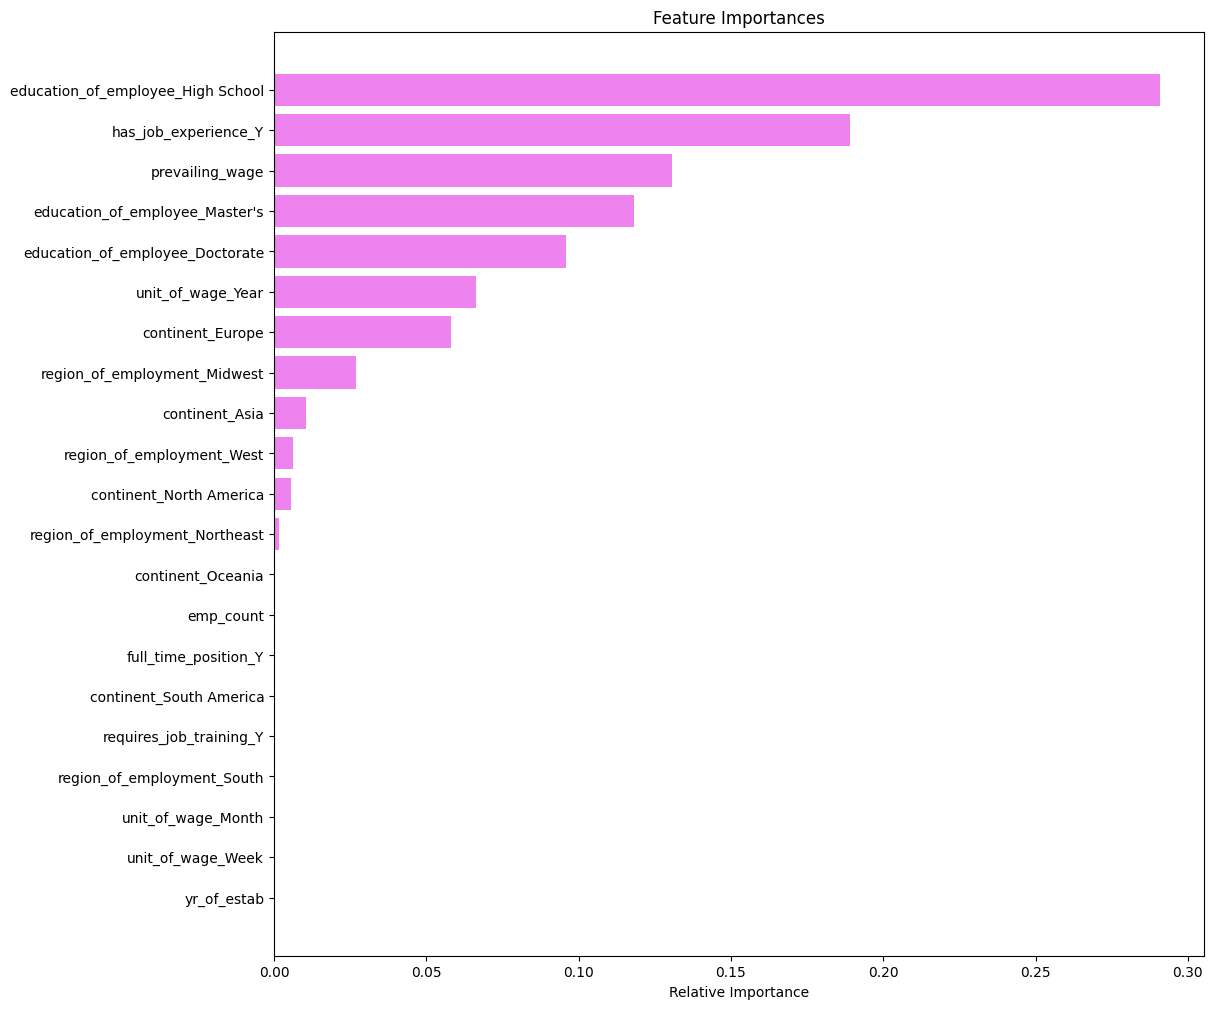

In [112]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### <font color='purple'>Insights and Recommendations </font>

<font color = 'purple'>Applicants with below key features have higher chance to get approved:</font>

* Education level - Bachelor's degree & Master's are preferred.
* Job Experience - Having job experience is better
* Prevailing wage - Jobs having higer prevailing wage have more applicants.
* Unit of Wage - Applicants have preferred Unit of Wage as 'Year'
* Continent - Applicants from Europe, Asia and North America have higher chances of visa certification.

<font color = 'purple'> Other Insights: </font>

* Out of ~77% (of total applications) from 'Asia' continent 43% are Certified.
* Applicants with Master's and Bachelor's have higher chance of getting certified. Total 55% of such applicants got certified.
* Application with Job Experience have more chance to get certified. Total 43% of such applicants got certified.
* Application requiring no Job Training requirement have more chance of getting certified. Total 59% of such applicants got certified.
* 'Year' as unit of wage is more preferred and have higher chance to get certified. Total 63% of such applicats got certified.
* Applications with Full time position have higher chance to get certified. Total 60% of such applicats got certified.
* No Co-Relation observed between numeric columns
* Midwest Region seems to have higher prevailing wages as compared to other regions
* Applicants with Bachelor's prefer Midwest & Island less as compared to other regions
* Applicants with Master's prefer Northeast and South more as compared to West and Midwes
* Doctorate are lesser among applicants but prefer West and Northeast region
* Very Less Applicants with Job Experience require Job training (1265)
* Good number of applicants with no Job Experience require no training (8988) which is surprising
